<a href="https://colab.research.google.com/github/divyaaids/naive-bayes/blob/main/NAVIE_BAYES(DIVYA_R).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("/content/card_transdata.csv")

In [8]:
df.head(100000)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
99995,1.674570,10.015549,0.618636,0.0,0.0,0.0,1.0,0.0
99996,16.908113,9.274847,0.251770,1.0,1.0,0.0,1.0,0.0
99997,6.195276,2.373588,9.652850,1.0,0.0,0.0,1.0,1.0
99998,43.637384,10.873590,4.108374,1.0,0.0,0.0,1.0,1.0


In [9]:
df1 = df.head(10000)

In [10]:
df1.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
9995,4.225100,2.678220,0.556858,1.0,0.0,0.0,1.0,0.0
9996,3.614858,0.431593,0.061778,1.0,0.0,0.0,1.0,0.0
9997,10.131863,10.262508,2.818090,1.0,0.0,0.0,1.0,0.0
9998,16.306236,0.014054,1.904495,1.0,0.0,0.0,1.0,0.0
9999,1.292596,0.415847,1.332285,0.0,1.0,0.0,1.0,0.0


In [11]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              10000 non-null  float64
 1   distance_from_last_transaction  10000 non-null  float64
 2   ratio_to_median_purchase_price  10000 non-null  float64
 3   repeat_retailer                 10000 non-null  float64
 4   used_chip                       10000 non-null  float64
 5   used_pin_number                 10000 non-null  float64
 6   online_order                    10000 non-null  float64
 7   fraud                           10000 non-null  float64
dtypes: float64(8)
memory usage: 625.1 KB


In [12]:
df1.shape

(10000, 8)

In [13]:
df1.nunique()

distance_from_home                10000
distance_from_last_transaction    10000
ratio_to_median_purchase_price    10000
repeat_retailer                       2
used_chip                             2
used_pin_number                       2
online_order                          2
fraud                                 2
dtype: int64

In [14]:
df1.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,26.374744,4.807107,1.824164,0.879000,0.350800,0.104800,0.641500,0.084100
std,58.811106,22.260124,2.762438,0.326144,0.477244,0.306311,0.479584,0.277552
min,0.049270,0.000930,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.808606,0.305219,0.489052,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.026888,1.006459,1.005754,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.866217,3.313696,2.091252,1.000000,1.000000,0.000000,1.000000,0.000000
max,2033.498174,990.070315,65.150879,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df1.isnull()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False


In [16]:
df1.notnull()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
9995,True,True,True,True,True,True,True,True
9996,True,True,True,True,True,True,True,True
9997,True,True,True,True,True,True,True,True
9998,True,True,True,True,True,True,True,True


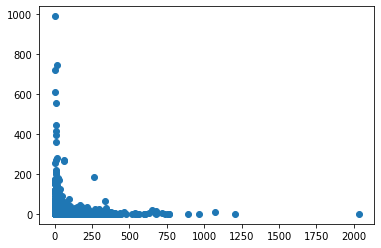

In [17]:
plt.scatter(df1.distance_from_home,df1.distance_from_last_transaction)
plt.show()

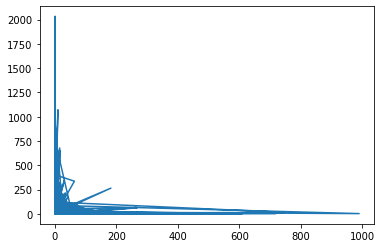

In [18]:
plt.plot(df1.distance_from_last_transaction,df1.distance_from_home)
plt.show()

<ipython-input-19-fd1c3dede909>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(df1.used_chip,df1.distance_from_home)


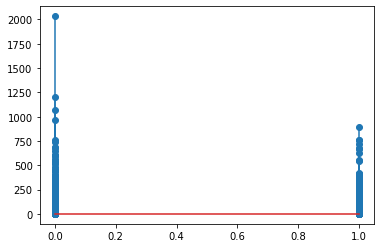

In [19]:
plt.stem(df1.used_chip,df1.distance_from_home)
plt.show()

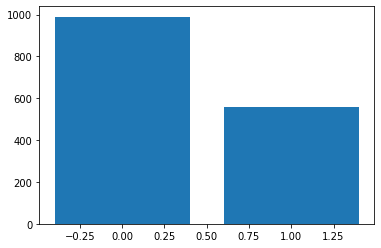

In [20]:
plt.bar(df1.used_chip,df1.distance_from_last_transaction)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

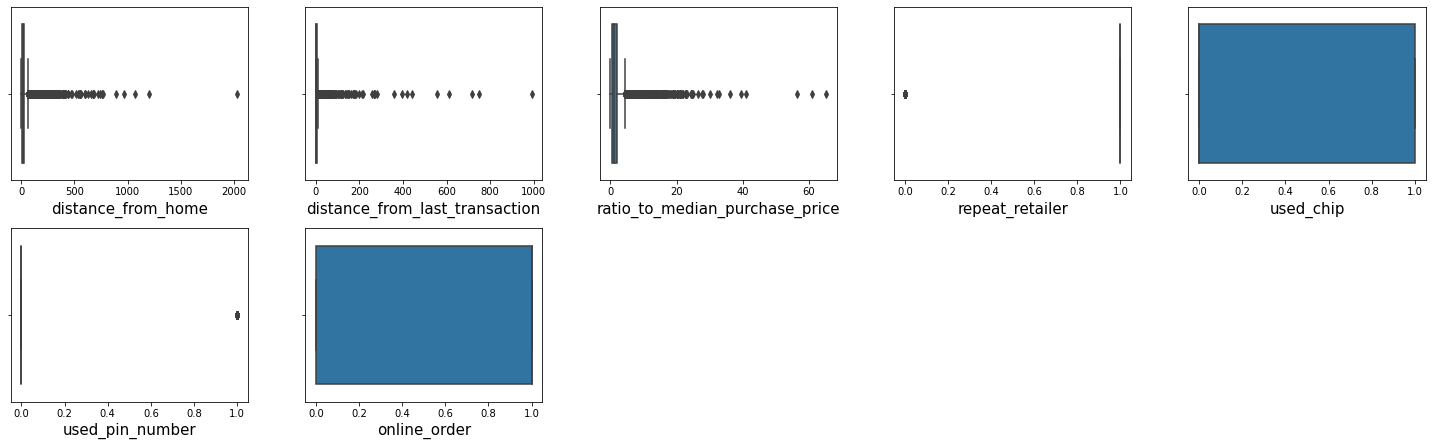

In [21]:
plt.figure(figsize=(20,15)) 
plotnumber = 1
X=df1.drop('fraud',axis=1) 
Y=df1['fraud']

for col in X.columns:
    if plotnumber <=8:
      ax=plt.subplot(5,5, plotnumber) 
      sns.boxplot(X[col]) 
      plt.xlabel(col,fontsize=15)

    plotnumber +=1
plt.tight_layout()
plt.show()

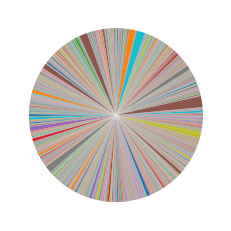

In [22]:
plt.pie(df1.distance_from_last_transaction)
plt.show()

In [23]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics  import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics  import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [24]:
df1.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       distance_from_home  distance_from_last_transaction  \
0                  False                           False   
1                  False                           False   
2                  False                           False   
3                  False                           False   
4                  False                           False   
...                  ...                             ...   
9995               False                           False   
9996               False                           False   
9997               False                           False   
9998               False                           False   
9999               False                           False   

      ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                              False            False      False   
1                              False            False      False   
2            

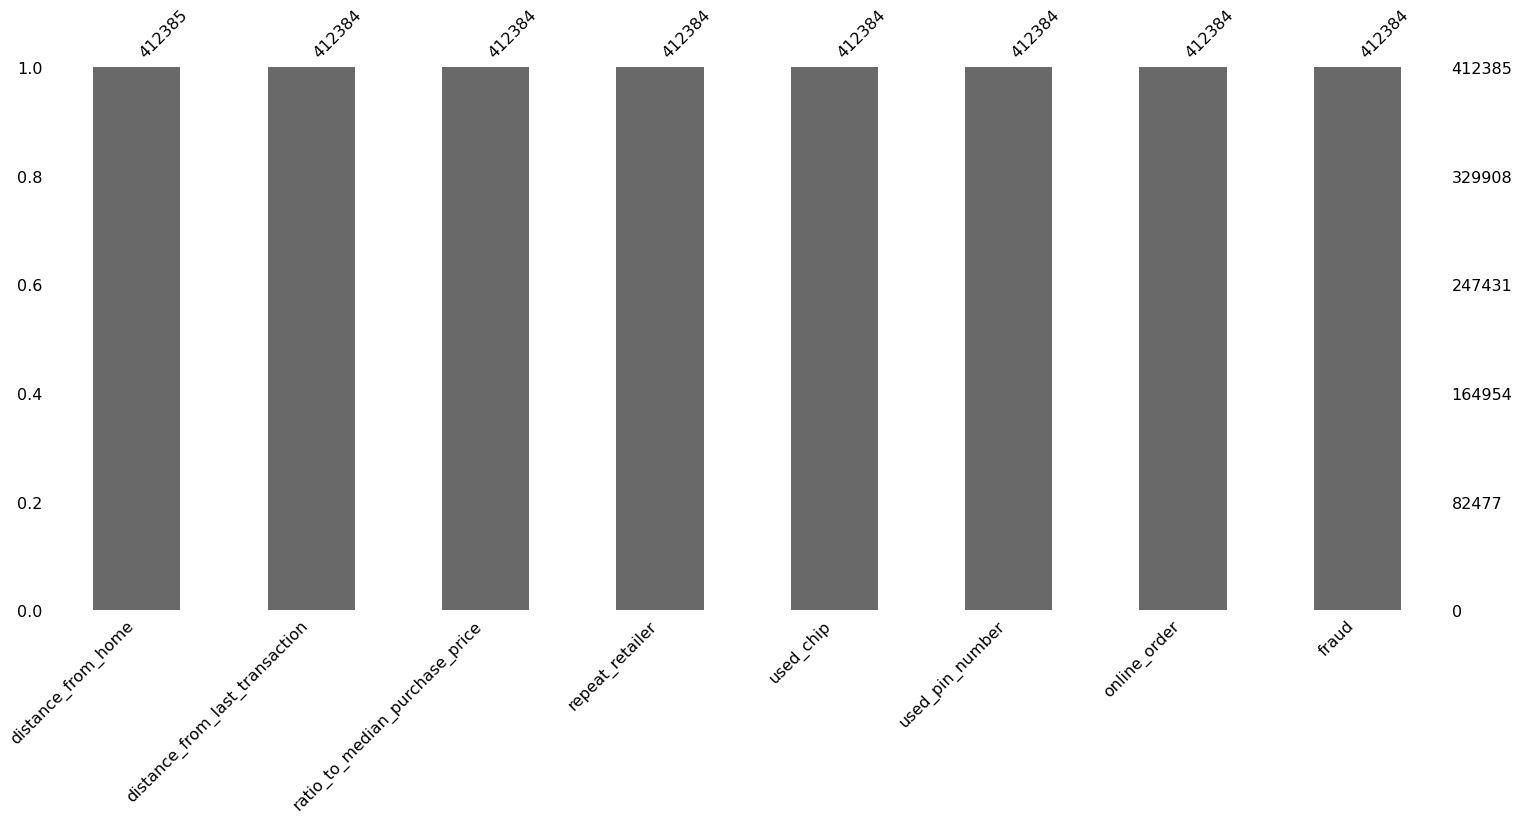

In [25]:
import missingno as msno
msno.bar(df)
plt.show()

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.5,random_state=0) 

In [27]:

 clf = DecisionTreeClassifier(criterion="entropy",random_state=0) 
 clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [28]:

Y_pred = clf.predict(X_train)

In [29]:
cm  = confusion_matrix(Y_train,Y_pred)
cm

array([[4600,    0],
       [   0,  400]])

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
 accuracy_score(Y_train,Y_pred)

1.0

In [32]:
 #naive bayes algorithm
from sklearn.naive_bayes import GaussianNB
clf1= GaussianNB()
clf1.fit(X_train,Y_train)
 

GaussianNB()

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.5,random_state=0) 

In [34]:
a = StandardScaler()
X_train = a.fit_transform(X_train) 
X_test = a.transform(X_test)

In [35]:
Y_pred = clf.predict(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [36]:
cm = confusion_matrix(Y_train,Y_pred)
cm

array([[4589,   11],
       [ 374,   26]])

In [37]:
accuracy_score(Y_train,Y_pred)

0.923